# Other Data Science Libraries

In [1]:
import numpy as np

## NumPy

* an extension package to Python for multi-dimensional arrays
* closer to hardware efficiency
* designed for scientific computation
* array oriented computing

In [2]:
a = np.array([0,1,2,3])
a

array([0, 1, 2, 3])

Memory-efficient container that provides fast numerical operations

In [3]:
L = range(1000)

%timeit [i**2 for i in L]

a = np.arange(1000)

%timeit a**2

152 µs ± 185 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
734 ns ± 1.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Matplotlib

Matplotlib is a visualization library in Python for 2D plots of arrays. Matplotlib is a multi-platform data visualization library built on NumPy arrays and designed to work with SciPy.

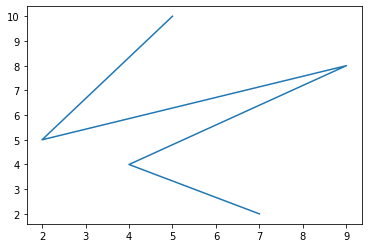

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

x = [5,2,9,4,7]
y = [10,5,8,4,2]
plt.plot(x,y)

<BarContainer object of 5 artists>

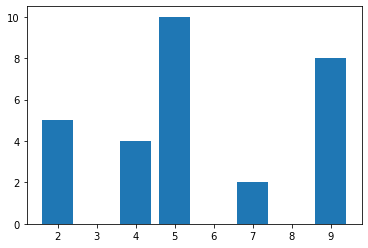

In [5]:
plt.bar(x,y)

(array([1., 0., 1., 1., 0., 0., 0., 1., 0., 1.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

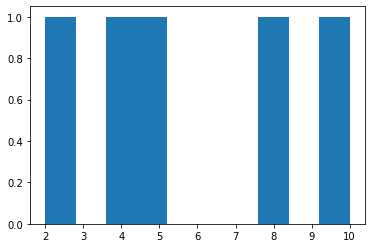

In [6]:
plt.hist(y)

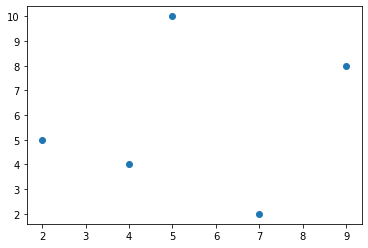

In [7]:
plt.scatter(x,y)

## Seaborn

Compliments and extends `matplotlib`

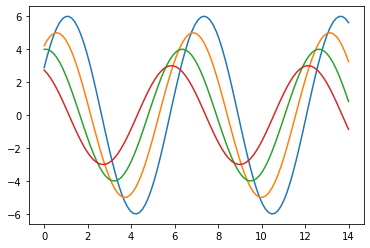

In [8]:
def sinplot(flip = 1):
   x = np.linspace(0, 14, 100)
   for i in range(1, 5): 
      plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sinplot()
plt.show()

This is how a plot looks like with default `matplotlib`. To change the same plot to Seaborn default, use the `set()` function

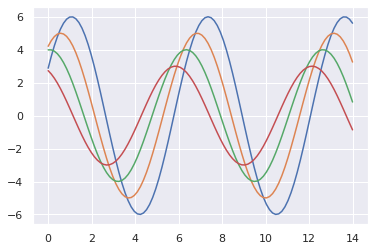

In [9]:
import numpy as np
from matplotlib import pyplot as plt
def sinplot(flip = 1):
   x = np.linspace(0, 14, 100)
   for i in range(1, 5):
      plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
import seaborn as sb
sb.set()
sinplot()
plt.show()

## Bokeh

Generates interactive visualizations with ease and also can handle very large or streaming datasets.

In [5]:
from bokeh.plotting import figure, show, output_file
from bokeh.sampledata.iris import flowers

y = flowers['sepal_length']
x = np.arange(0, len(y))

p = figure(plot_width = 600, plot_height = 600, title = "line plot on sepal_length", x_axis_label = "rows", y_axis_label = "sepal_length")

p.line(x, y, line_color = "red")

output_file("line_plot.html")

show(p)

## Scikit Learn

* Provides a range of supervised and unsupervised learning algorithms via a consistent interface

In [6]:
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
dataset = datasets.load_iris()
model = DecisionTreeClassifier()
model.fit(dataset.data, dataset.target)
print(model)
expected = dataset.target
predicted = model.predict(dataset.data)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


## Tensorflow

A Library for dataflow and differentiable programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks.

In [7]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2223 - accuracy: 0.9343
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0990 - accuracy: 0.9703
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0692 - accuracy: 0.9781
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0547 - accuracy: 0.9824
Epoch 5/5
313/313 [==============================] - 0s 936us/step - loss: 0.0785 - accuracy: 0.9757


[0.07848811894655228, 0.9757000207901001]

## NLTK

Natural Language ToolKit is the most popular Python framework for working with human language. 

In [8]:
import nltk
nltk.download('reuters')
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
 
## Bigrams
finder = BigramCollocationFinder.from_words(nltk.corpus.reuters.words())
 
# only bigrams that appear 5+ times
finder.apply_freq_filter(5)
 
# return the 50 bigrams with the highest PMI
print(finder.nbest(bigram_measures.pmi, 50))
# among the collocations we can find stuff like: (u'Corpus', u'Christi'), (u'mechanically', u'separated'), (u'Kuala', u'Lumpur'), (u'Mathematical', u'Applications')
 
## Trigrams
finder = TrigramCollocationFinder.from_words(nltk.corpus.reuters.words())
# only trigrams that appear 5+ times
finder.apply_freq_filter(5)
 
# return the 50 trigrams with the highest PMI
print(finder.nbest(trigram_measures.pmi, 50))
# among the collocations we can find stuff like: (u'GHANA', u'COCOA', u'PURCHASES'), (u'Punta', u'del', u'Este'), (u'Special', u'Drawing', u'Rights')

[nltk_data] Downloading package reuters to /home/iti/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


[('DU', 'PONT'), ('Keng', 'Yaik'), ('Kwik', 'Save'), ('Nihon', 'Keizai'), ('corenes', 'pora'), ('fluidized', 'bed'), ('Akbar', 'Hashemi'), ('Constructions', 'Telephoniques'), ('Elevator', 'Mij'), ('Entre', 'Rios'), ('Graan', 'Elevator'), ('JIM', 'WALTER'), ('Taikoo', 'Shing'), ('der', 'Vorm'), ('di', 'Clemente'), ('Borrowing', 'Requirement'), ('FOOTE', 'MINERAL'), ('Hawker', 'Siddeley'), ('JARDINE', 'MATHESON'), ('PRORATION', 'FACTOR'), ('Wildlife', 'Refuge'), ('Kohlberg', 'Kravis'), ('Almir', 'Pazzionotto'), ('Bankhaus', 'Centrale'), ('Corpus', 'Christi'), ('Kuala', 'Lumpur'), ('Maple', 'Leaf'), ('Stats', 'Oljeselskap'), ('Zoete', 'Wedd'), ('Neutral', 'Zone'), ('Tadashi', 'Kuranari'), ('Drawing', 'Rights'), ('EASTMAN', 'KODAK'), ('Martinez', 'Cuenca'), ('Mathematical', 'Applications'), ('Townsend', 'Thoresen'), ('Sector', 'Borrowing'), ('Hashemi', 'Rafsanjani'), ('Hossein', 'Mousavi'), ('Kitty', 'Hawk'), ('SLAUGHTER', 'GUESSTIMATES'), ('Task', 'Force'), ('Tender', 'Loving'), ('WELLS',

Reference: 
* https://scipy-lectures.org/intro/numpy/array_object.html
* https://www.tutorialspoint.com/seaborn/seaborn_figure_aesthetic.htm
* https://zapcircle.net/introduction-to-bokeh/